# Create MMC profiles

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd 
import numpy as np

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
tstart = np.datetime64('2023-08-23T22:15')
tend   = np.datetime64('2023-08-25T00:00')
t_5AM  = np.datetime64('2023-08-24T05:00')
t_7AM  = np.datetime64('2023-08-24T07:00')

def filtertime(tvec, t1, t2):
    mask = []
    for t in tvec:
        if (t1 <= np.datetime64(t)) and (np.datetime64(t) <= t2):
            mask.append(True)
        else:
            mask.append(False)
    return mask

def timedelta(tvec, tbase):
    tsecs = []
    for t in tvec:
        tsecs.append()
        

In [3]:
# Define the path to your NetCDF file
file_path = 'Lidars/A1_profiling_lidar_10min.nc'
#file_path = 'A1_profiling_lidar_1s.nc'
# Open the NetCDF file
lds = xr.open_dataset(file_path)

In [4]:
# Open NetCDF files
ds_A1 = xr.open_dataset('A1_sonic_phase1.nc')

# Open the NetCDF file
ds_temperature = xr.open_dataset('B_ASSIST_phase1.nc')

## Plot velocity

Text(0.5, 0, 'WD [deg]')

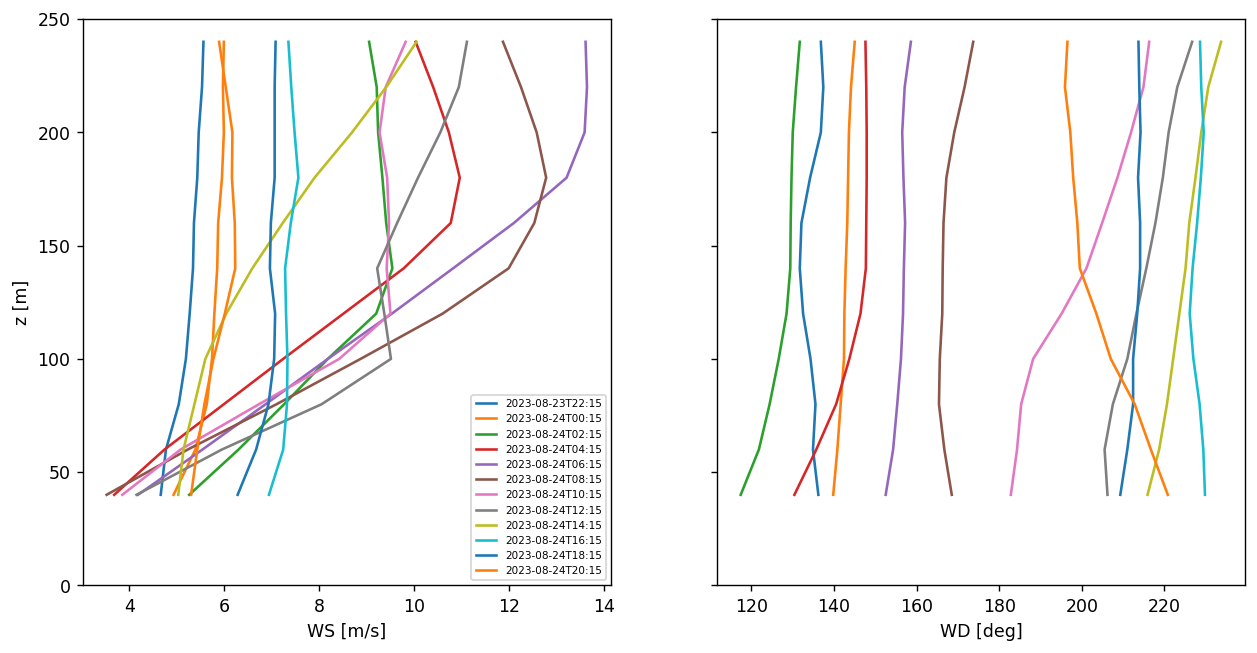

In [5]:
tmask = filtertime(np.array(lds['U']['time']), tstart, tend)

fig, axs = plt.subplots(1, 2, figsize=(12,6), dpi=125, sharey=True)
times = lds['U']['time'][tmask]
Umask = lds['U'].values[tmask, :]
WDmask = lds['WD'].values[tmask, :]

itimes = np.arange(0, 144, 12)
for i in itimes:
    Uprof = Umask[i]
    WDprof = WDmask[i]
    ts = times[i]
    axs[0].plot(Uprof, lds['U']['height'].values, label=np.datetime_as_string(ts)[:16])
    axs[1].plot(WDprof, lds['WD']['height'].values, label=np.datetime_as_string(ts)[:16])
    
axs[0].legend(prop={'size': 6})
axs[0].set_ylim([0, 250])
axs[0].set_ylabel('z [m]')
axs[0].set_xlabel('WS [m/s]')
axs[1].set_xlabel('WD [deg]')

In [6]:
# Write data to arrays
Udat = np.array(Umask)
WDdat = np.array(WDmask)
Uheights = lds['U']['height'].values
timessec = (times-tstart)/np.timedelta64(1, 's')
writeFiles = False

# save the profile data and times
if writeFiles:
    np.savetxt('WSprofiles1.dat', Udat)
    np.savetxt('WDprofiles1.dat', WDdat)
    np.savetxt('Utimes1.dat', timessec)
    np.savetxt('Uheights.dat', Uheights)
#print(Udat.shape)
#print(WDmask)

In [7]:
print('%12s    %s'%('Time [s]','Time [UTC]'))
for i, t in enumerate(timessec):
    print('%12.1f    %s'%(t, np.datetime_as_string(times[i])))
    
print('8-24 5AM = '+repr((t_5AM-tstart)/np.timedelta64(1, 's')))
print('8-24 7AM = '+repr((t_7AM-tstart)/np.timedelta64(1, 's')))

    Time [s]    Time [UTC]
         0.0    2023-08-23T22:15:00.000000000
       600.0    2023-08-23T22:25:00.000000000
      1200.0    2023-08-23T22:35:00.000000000
      1800.0    2023-08-23T22:45:00.000000000
      2400.0    2023-08-23T22:55:00.000000000
      3000.0    2023-08-23T23:05:00.000000000
      3600.0    2023-08-23T23:15:00.000000000
      4200.0    2023-08-23T23:25:00.000000000
      4800.0    2023-08-23T23:35:00.000000000
      5400.0    2023-08-23T23:45:00.000000000
      6000.0    2023-08-23T23:55:00.000000000
      6600.0    2023-08-24T00:05:00.000000000
      7200.0    2023-08-24T00:15:00.000000000
      7800.0    2023-08-24T00:25:00.000000000
      8400.0    2023-08-24T00:35:00.000000000
      9000.0    2023-08-24T00:45:00.000000000
      9600.0    2023-08-24T00:55:00.000000000
     10200.0    2023-08-24T01:05:00.000000000
     10800.0    2023-08-24T01:15:00.000000000
     11400.0    2023-08-24T01:25:00.000000000
     12000.0    2023-08-24T01:35:00.000000000
     12

In [8]:
# Define the path to your NetCDF file
file_path = 'Lidars/A1_scanning_lidar_10min_phase1.nc'
# Open the NetCDF file
TKEds = xr.open_dataset(file_path)

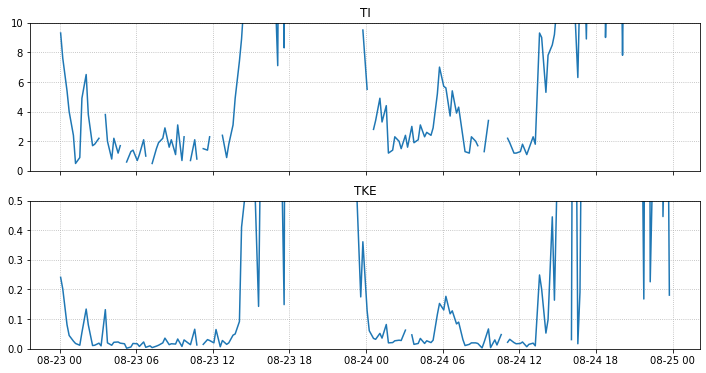

In [9]:
fig, axs = plt.subplots(2,1,figsize=(12,6),sharex=True)
axs[0].plot(TKEds['time'], TKEds['TI'])
axs[0].set_title('TI')
axs[0].set_ylim([0, 10])
axs[0].grid(ls=':')
axs[1].plot(TKEds['time'], TKEds['TKE'])
axs[1].set_title('TKE')
axs[1].set_ylim([0, 0.5])
axs[1].grid(ls=':')

In [10]:
# save TKE data
TKEsavedat = np.vstack(((TKEds['time']-tstart)/np.timedelta64(1, 's'), TKEds['TKE']))
np.savetxt('TKE_history1.dat', TKEsavedat.transpose())

## Plot surface temperature and Obukhov length

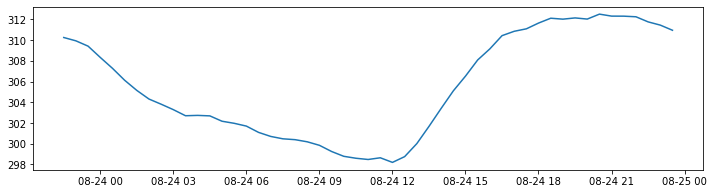

In [11]:
plt.figure(figsize=(12,3))
ttmask = filtertime(np.array(ds_temperature['time']), tstart, tend)
plt.plot(ds_temperature['time'][ttmask], ds_temperature['temperature'][ttmask]+273.15)

In [12]:
# Save the surface temperature
Ttimes   = (ds_temperature['time'][ttmask]-tstart)/np.timedelta64(1, 's')
Tsavedat = np.vstack((Ttimes, ds_temperature['temperature'][ttmask]+273.15))
print(Tsavedat.shape)
np.savetxt('surftemp1.dat',Tsavedat.transpose())

(2, 51)


(-100.0, 100.0)

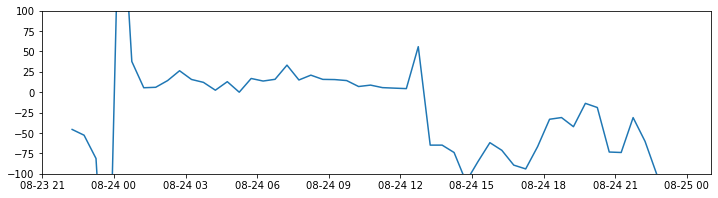

In [13]:
plt.figure(figsize=(12,3))
ltmask = filtertime(np.array(ds_A1['time']), tstart, tend)
plt.plot(ds_A1['time'][ltmask], ds_A1['L'][ltmask])
plt.ylim([-100, 100])

The Obukhov length is defined as
$$
L = - \frac{u_\tau^3 \overline{\theta}}{\kappa g (\overline{w'\theta'}) }
$$

From which we can calculate the temperature flux as 
$$
(\overline{w'\theta'}) = - \frac{u_\tau^3 \overline{\theta}}{\kappa g L }
$$


In [14]:
# Estimate ustar
dUdz = (Udat[:,1]-Udat[:,0])/(Uheights[1]-Uheights[0])
#dUdz = Udat[:,0]/Uheights[0]
kappa = 0.41
ustar = kappa*dUdz*Uheights[0]
#print(np.array(timessec))
#print(ustar)

ustar_interp = np.interp(Ttimes, timessec, ustar)

In [15]:
# Calculate temperature flux
Tsurf = np.array(ds_temperature['temperature'][ttmask]+273.15)  # Kelvin
g     = 9.81 # m/s^2
L     = np.array(ds_A1['L'][ttmask])
Tflux = -(ustar_interp**3)*Tsurf/(kappa*g*L)

In [16]:
Tfluxsavedat = np.vstack((Ttimes, Tflux))
np.savetxt('Tflux1.dat',Tfluxsavedat.transpose())

(-10.0, 5.0)

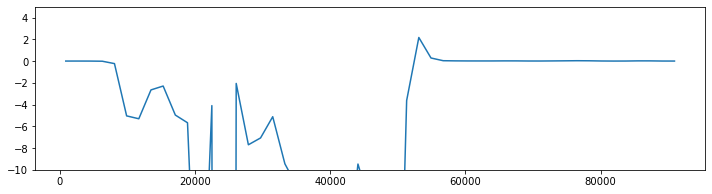

In [17]:
plt.figure(figsize=(12,3))
plt.plot(Tfluxsavedat[0,:], Tfluxsavedat[1,:])
plt.ylim([-10,5])

In [18]:
print(Tfluxsavedat[1,:])

[ 2.11045770e-03  2.76766357e-03  3.01415143e-04 -1.29929083e-02
 -2.32163187e-01 -5.04105985e+00 -5.30609802e+00 -2.65173604e+00
 -2.29601202e+00 -4.96481023e+00 -5.67263447e+00 -3.19946899e+01
 -4.09651073e+00 -5.48030374e+02 -2.05663639e+00 -7.69766260e+00
 -7.06943743e+00 -5.11677416e+00 -9.45273739e+00 -1.15453815e+01
 -1.38017133e+01 -1.04854169e+01 -1.12608543e+01 -2.00110310e+01
 -9.47104329e+00 -1.31749094e+01 -1.76771996e+01 -4.47840785e+01
 -3.62796314e+00  2.16991551e+00  2.83880255e-01  3.44342589e-02
  1.90781213e-02  1.27791771e-02  1.14958852e-02  1.18818476e-02
  1.80664753e-02  1.71167053e-02  7.41392054e-03  6.17412258e-03
  1.45400336e-02  2.40034930e-02  3.35881505e-02  2.67603848e-02
  8.28214438e-03  1.88856715e-03  4.37609347e-03  1.95228774e-02
  1.85280547e-02  4.13985639e-03  2.48387557e-03]
